In [30]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2.3.1 Prior Probabrility Model

Example with the chess world champion playing against the chess computer Deep Blue.

We'd like to model the probability of the champion to win against the computer 'π'.

To simplify the problem we use a discrete prior with following pmf:

| π    | 0.2 | 0.5  | 0.8  | Total |
|------|-----|------|------|-------|
| f(π) | 0.1 | 0.25 | 0.65 | 1     |

In [25]:
pi = pd.DataFrame({"prior":[0.1, 0.25, 0.65]}, index=[0.2, 0.5, 0.8])
pi.index.name = "π"
pi

,prior
π,
0.2,0.10
0.5,0.25
0.8,0.65


# 2.3.2 The Binomial data model

The data model is a random variable which counts the number of wins (0-6). The data model should model the plausability of the prior probability given the data. In that case the binomial distribution should suit the case.

In the rematch the champion only won one of the six games.

So the likelihool looks like:

In [26]:
wins = 1
of = 6

pi["likelihood"] = stats.binom.pmf(k=wins, n=of, p=pi.index)
pi

,prior,likelihood
π,,
0.2,0.10,0.393216
0.5,0.25,0.093750
0.8,0.65,0.001536


As we can see it is most likely that the probability of the champion winning is 0.2 according to the data model. 

# 2.3.4 Normalizing constant

Now we have calculated the plausibility of the different winning chances given the data. Now we have to figure out what the posterior looks like.

Therefore we weight the prior with the likelihoods:



In [27]:
pi["weighted"] = pi["prior"]*pi["likelihood"]

pi

,prior,likelihood,weighted
π,,,
0.2,0.10,0.393216,0.039322
0.5,0.25,0.093750,0.023438
0.8,0.65,0.001536,0.000998


As we can see it is now most likely that the winning probability is 0.2 now.

# 2.3.5 Posterior probability model

To get the posterior probability function we have to figure out what the probability is of the champion winning exactly one game $P(n=6, k=1)$ for all probabilites $π$. This is calculated by the marginalization

$$P(n=6, k=1, p=0.2)*P(π=0.2) + P(n=6, k=1, p=0.5)*P(π=0.5) + P(n=6, k=1, p=0.8)*P(π=0.8)$$

Exactly this was already calculated in the `weighted` column. So we simpli have to sum this together and divide the weighted column by this:

In [28]:
pi["posterior"] = pi["weighted"] / pi["weighted"].sum()
pi

,prior,likelihood,weighted,posterior
π,,,,
0.2,0.10,0.393216,0.039322,0.616737
0.5,0.25,0.093750,0.023438,0.367604
0.8,0.65,0.001536,0.000998,0.015659


In [32]:
pi[["prior", "likelihood", "posterior"]].reset_index().melt(id_vars="π")

,π,variable,value
0,0.2,prior,0.100000
1,0.5,prior,0.250000
2,0.8,prior,0.650000
3,0.2,likelihood,0.393216
4,0.5,likelihood,0.093750
5,0.8,likelihood,0.001536
6,0.2,posterior,0.616737
7,0.5,posterior,0.367604
8,0.8,posterior,0.015659


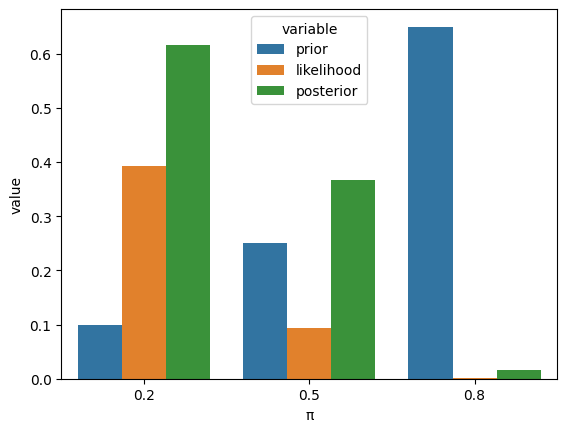

In [36]:
sns.barplot(pi[["prior", "likelihood", "posterior"]].reset_index().melt(id_vars="π"), x="π", y="value", hue="variable") 
plt.show()